In [37]:
# Importing Libraries:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 15,6
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')
print('Setup Complete')

Setup Complete


In [38]:
# Loading the data:
df = pd.read_csv(r"...\Salary.csv")

In [39]:
# Exploring the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [40]:
# Getting the columns' names 
col_names = df.columns
print(col_names)

Index(['YearsExperience', 'Salary'], dtype='object')


In [41]:
# Basic statistics for Salary
Salary_stats = df['Salary'].describe()
print(Salary_stats)

# Calculating the range of LIST_PRICE
Salary_range = df['Salary'].max() - df['Salary'].min()
print("Range of Salary: ", Salary_range)

count        35.000000
mean      83945.600000
std       32162.673003
min       37731.000000
25%       57019.000000
50%       81363.000000
75%      113223.500000
max      139465.000000
Name: Salary, dtype: float64
Range of Salary:  101734


The intercept of the regression equation is: [29445.05652018]
The slope of the regression equation is: [[8629.79240044]]
Root Mean Squared Error: 4069.6057820106575


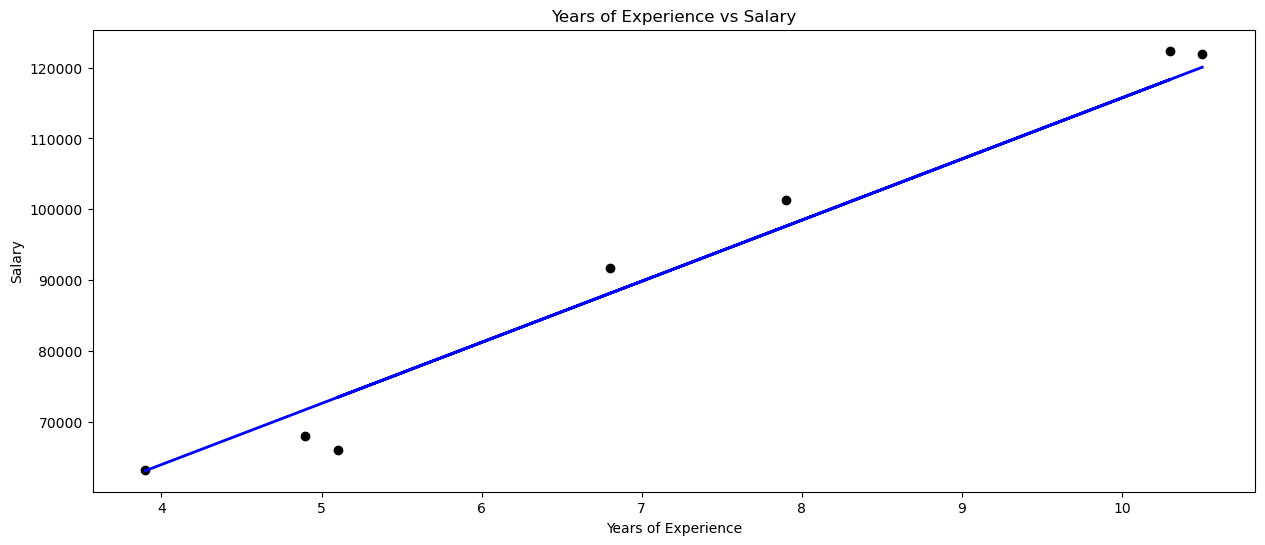

In [42]:
# Defining the X and y:

X = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values.reshape(-1,1)

# Splitting the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building and fitting the model:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# retrieve the intercept:
print(f'The intercept of the regression equation is: {regressor.intercept_}')

# retrieve the slope (coefficient of x):
print(f'The slope of the regression equation is: {regressor.coef_}')

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the model
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

# Plotting the regression line and the test data 
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.show()


In [43]:
# Calculating the RMSE as a percentage of the range of the dependent:
# The Normalized Root Mean Square Error (NRMSE):

salary_range = df['Salary'].max() - df['Salary'].min()
NRMSE = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)) / salary_range) * 100
print(f'Normalized Root Mean Squared Error: {NRMSE}%')



Normalized Root Mean Squared Error: 4.00024159279165%


In [44]:
# Printing the equation itself
print("The regression equation is: Salary = {:.2f}*YearsExperience + {:.2f}".format(regressor.coef_[0][0], regressor.intercept_[0]))


The regression equation is: Salary = 8629.79*YearsExperience + 29445.06
